In [2]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
scipy.__version__

'1.9.3'

In [4]:
df = pd.read_csv('Data/Medical data.csv')
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53,86575.93,Divorced,Male,0,...,0.0,1.0,1.0,1.0,0,1,Blood Work,10.585770,3726.702860,17939.403420
1,FL,30.84513,-85.22907,Urban,3.0,51,46805.99,Married,Female,0,...,0.0,0.0,0.0,0.0,1,0,Intravenous,15.129562,4193.190458,17612.998120
2,SD,43.54321,-96.63772,Suburban,3.0,53,14370.14,Widowed,Female,0,...,0.0,0.0,0.0,0.0,0,0,Blood Work,4.772177,2434.234222,17505.192460
3,MN,43.89744,-93.51479,Suburban,0.0,78,39741.49,Married,Male,0,...,0.0,0.0,0.0,0.0,1,1,Blood Work,1.714879,2127.830423,12993.437350
4,VA,37.59894,-76.88958,Rural,1.0,22,1209.56,Widowed,Female,0,...,1.0,0.0,0.0,1.0,0,0,CT Scan,1.254807,2113.073274,3716.525786


In [5]:
df.isna().sum()

State                 5
Lat                   0
Lng                   0
Area                  5
Children              7
Age                   0
Income                0
Marital               5
Gender                5
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         5
HighBlood             0
Stroke                0
Complication_risk     5
Overweight            0
Arthritis             6
Diabetes              6
Hyperlipidemia        2
BackPain              8
Anxiety               2
Allergic_rhinitis     6
Reflux_esophagitis    0
Asthma                0
Services              5
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

There is no missing values in columns that needed for describing distribution

In [18]:
def plot_hist(col):
    feature = df[col]
    mean = feature.mean()
    median = feature.median()
    std = feature.std()
    plus_one_std = mean + std
    minus_one_std = mean - std
    fig, ax = plt.subplots(figsize = (10,6))
    sns.histplot (data = feature, ax = ax, stat = 'probability', kde= True)
    ax.axvline(mean, color = 'red', label = f'Mean = {mean:,.2f}')
    ax.axvline(mean, color = 'green', label = f'Median = {mean:,.2f}',  ls='-.')
    ax.axvline(plus_one_std, color = 'black',label=f'+1 std = {plus_one_std:,.2f}')
    ax.axvline(minus_one_std, color = 'black', label = f'-1 std = {minus_one_std:,.2f}')
    ax.axvspan(plus_one_std, minus_one_std, color = 'yellow', zorder = 0)
    ax.set_title(f'{col}')
    ax.legend();

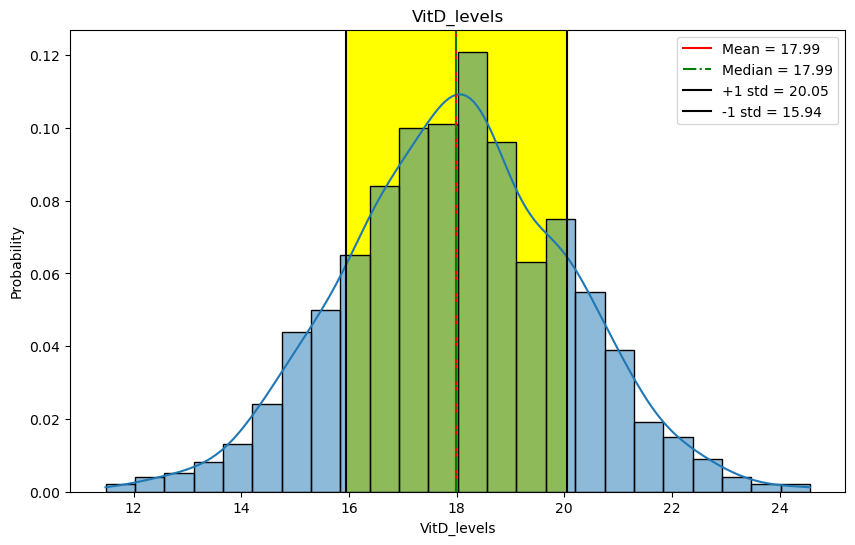

In [19]:
plot_hist('VitD_levels')

In [23]:
kurt = stats.kurtosis(df['VitD_levels'], fisher = False)
kurt

3.013147515833447

- This is a continuous distribution
- It has no skew
- It has Mesokurtic type of Kurtiosis

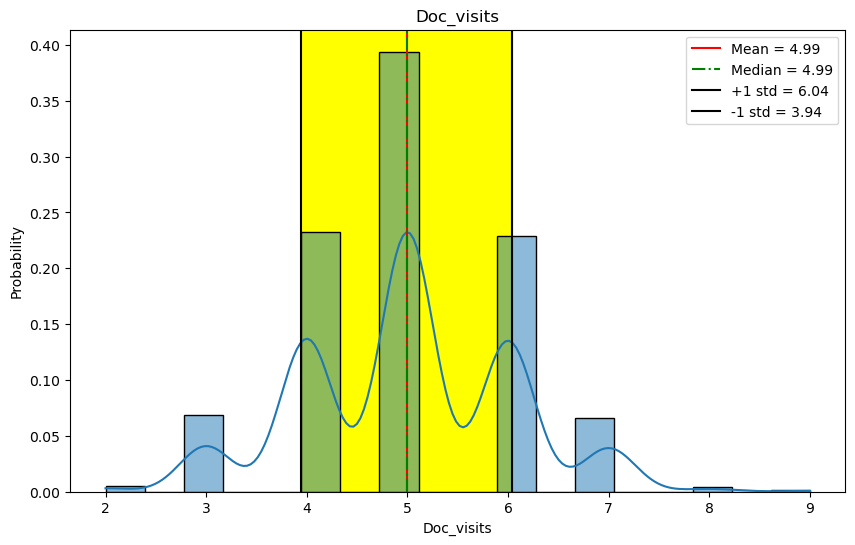

In [20]:
plot_hist('Doc_visits')

In [24]:
kurt = stats.kurtosis(df['Doc_visits'], fisher = False)
kurt

2.9919958083381206

- This is a discrete distribution
- It doesn't have a skew
- It has Mesokurtic type of Kurtiosis

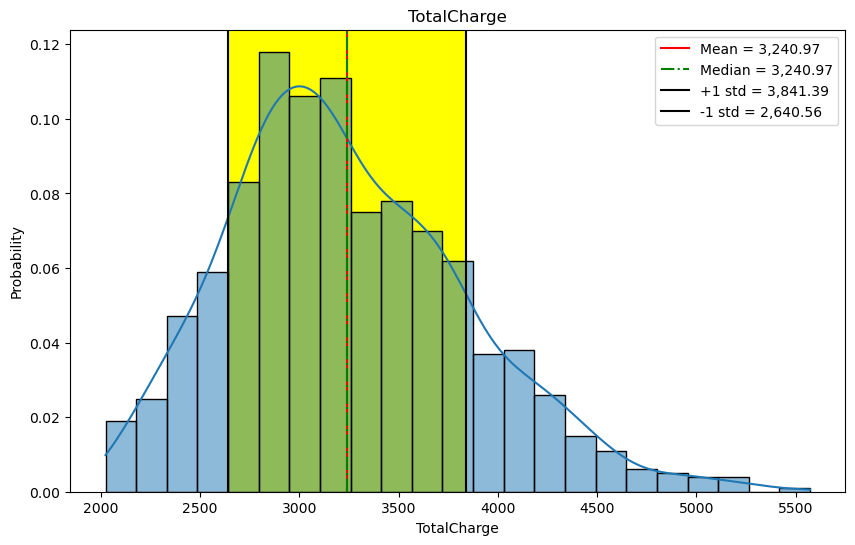

In [21]:
plot_hist('TotalCharge')

In [25]:
kurt = stats.kurtosis(df['TotalCharge'], fisher = False)
kurt

3.2650077463439384

- This is a continuous distribution
- It has a positive skew
- It has Leptokurtic type of Kurtosis